# HOUSE PRICE PREDICTION ASSIGNMENT-USING RIDGE AND LASSO REGRESSION

### Problem Statement

# STEP 1 : Reading and understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

In [6]:
#checking if there are any null values in the dataset
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
#counting the number of null values in the data 
null=pd.DataFrame(round(df.isnull().sum()/len(df.index)*100, 2).sort_values(ascending=False),columns=["Null values"])
null.index.name="features"
null.head(10)

,Null values
features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [8]:
#checking null values which are greater than 0
n=null[null["Null values"]>0]
n
#there are a total of 19 values which have null values >0 

,Null values
features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [9]:
#we need to drop the highest values in features which is PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage
df=df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"],axis=1)

In [10]:
null=pd.DataFrame(round(df.isnull().sum()/len(df.index)*100, 2).sort_values(ascending=False),columns=["Null values"])
null.index.name="features"
n=null[null["Null values"]>0]
n

,Null values
features,
GarageType,5.55
GarageCond,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtCond,2.53


In [11]:
#let us check the value counts of the above variables

df["GarageType"].value_counts()/len(df["GarageType"])

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

In [12]:
df["GarageCond"].value_counts()/len(df["GarageCond"])

TA    0.908219
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

In [13]:
df["GarageYrBlt"].value_counts()/len(df["GarageYrBlt"])

2005.0    0.044521
2006.0    0.040411
2004.0    0.036301
2003.0    0.034247
2007.0    0.033562
            ...   
1927.0    0.000685
1900.0    0.000685
1906.0    0.000685
1908.0    0.000685
1933.0    0.000685
Name: GarageYrBlt, Length: 97, dtype: float64

In [14]:
df["GarageFinish"].value_counts()/len(df["GarageFinish"])

Unf    0.414384
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64

In [15]:
df["GarageQual"].value_counts()/len(df["GarageQual"])

TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

In [16]:
df["BsmtFinType2"].value_counts()/len(df["BsmtFinType2"])

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

In [17]:
df["BsmtExposure"].value_counts()/len(df["BsmtExposure"])

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

In [18]:
df["BsmtFinType1"].value_counts()/len(df["BsmtFinType1"])

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

In [19]:
df["BsmtCond"].value_counts()/len(df["BsmtCond"])

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

In [20]:
df["BsmtQual"].value_counts()/len(df["BsmtQual"])

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

In [21]:
df["MasVnrArea"].value_counts()/len(df["MasVnrArea"])

0.0      0.589726
180.0    0.005479
72.0     0.005479
108.0    0.005479
120.0    0.004795
           ...   
562.0    0.000685
89.0     0.000685
921.0    0.000685
762.0    0.000685
119.0    0.000685
Name: MasVnrArea, Length: 327, dtype: float64

In [22]:
df["MasVnrType"].value_counts()/len(df["MasVnrType"])

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [23]:
df["Electrical"].value_counts()/len(df["Electrical"])

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

In [24]:
#from the data we can see that some columns are not of any use and can be dropped as they wont add any meaning to the model

df.drop(["GarageQual","BsmtFinType2","BsmtCond","GarageYrBlt","MasVnrArea","BsmtExposure","GarageCond"],axis=1,inplace=True)

In [25]:
df.shape

(1460, 68)

## Univariate Analysis

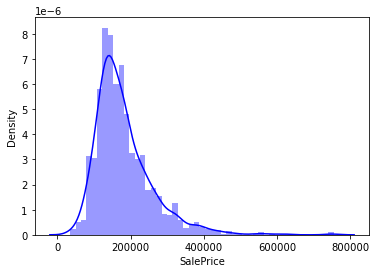

In [34]:
sns.distplot(df["SalePrice"],color='b')
plt.show()


## Bivariate

<AxesSubplot:>

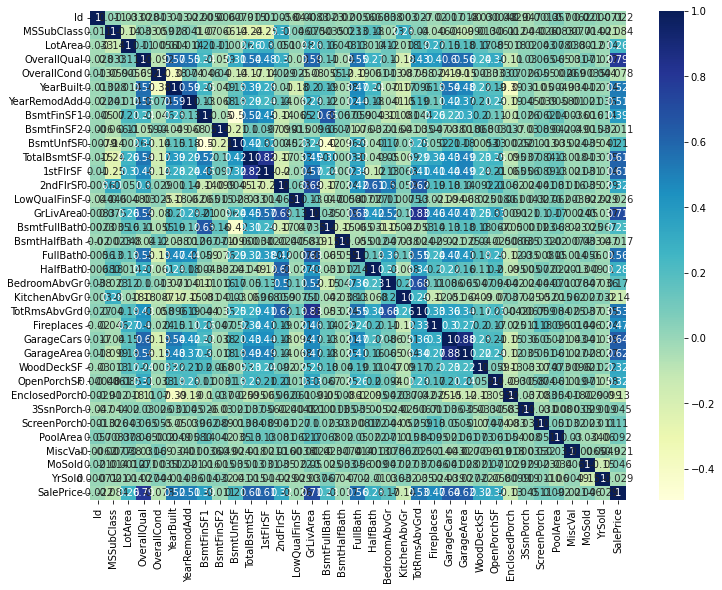

In [26]:
#correlation map to see how features are correlated with salesprice using heatmap
corr=df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,cmap="YlGnBu",annot=True)
#garageArea and GarageCars are highly correlated

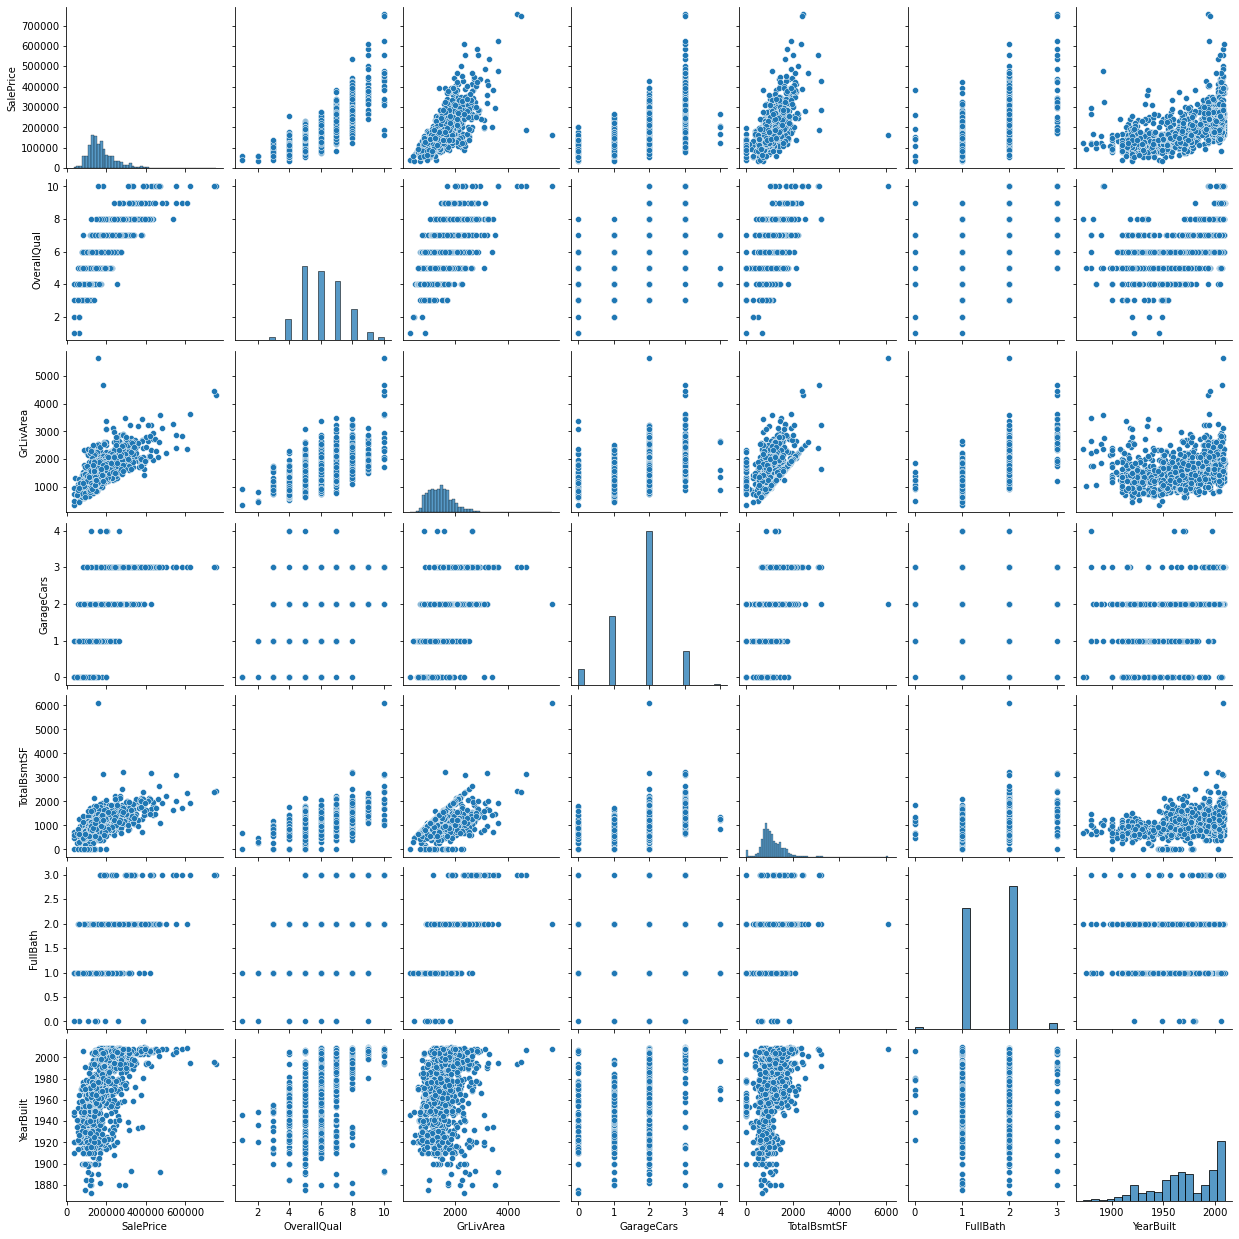

In [27]:
#visualising the numerical variables in the dataset
sns.pairplot(df,vars=["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"])
plt.show()

In [28]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCon

In [29]:
df=df.drop(["Id"],axis=1)
df.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [30]:
df.shape

(1460, 67)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

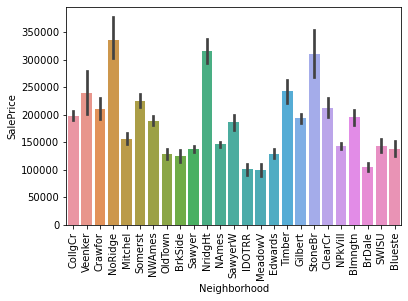

In [31]:
#visualizing variables in  the dataset with target variable
#plot "saleprice" vs "neighbourhood"

sns.barplot(x="Neighborhood",y="SalePrice",data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

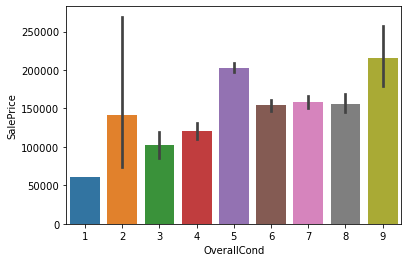

In [32]:
#"overallcond" vs "saleprice"
sns.barplot(x="OverallCond",y="SalePrice",data=df)


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

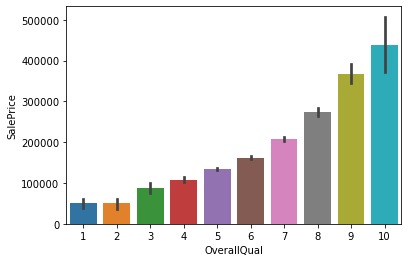

In [33]:
sns.barplot(x="OverallQual",y="SalePrice",data=df)

### Exploratory Data Analysis

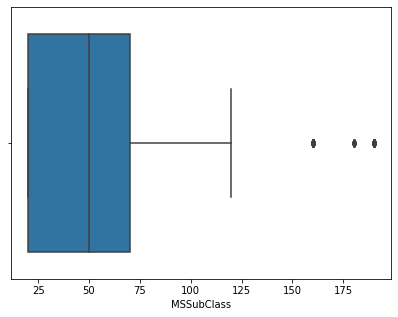

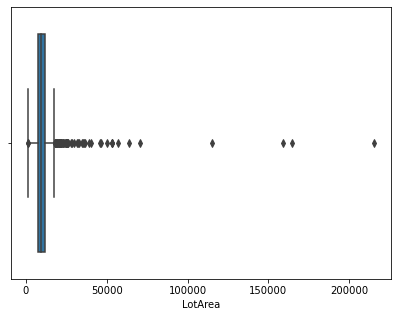

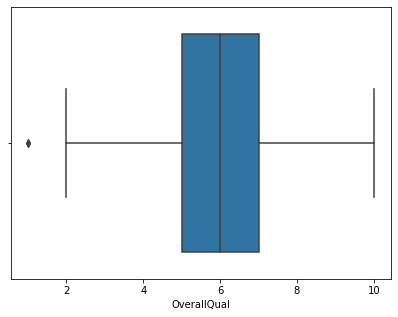

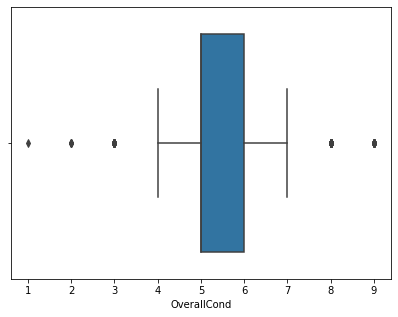

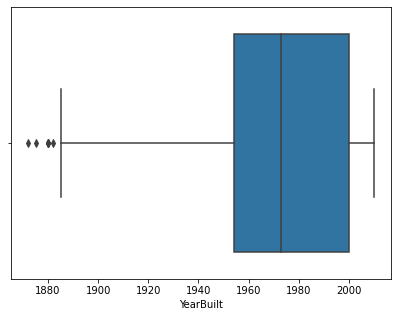

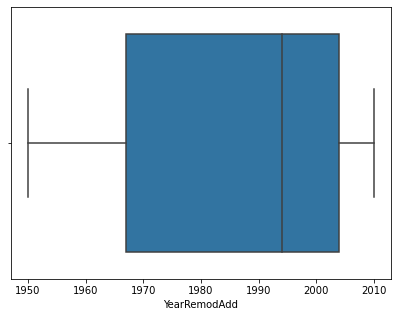

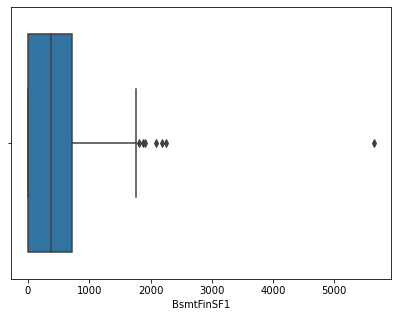

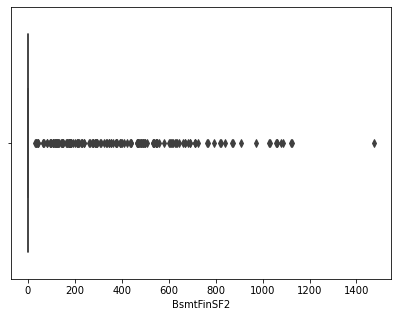

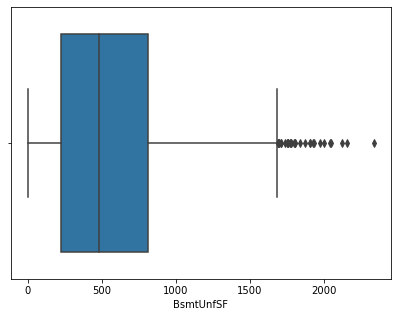

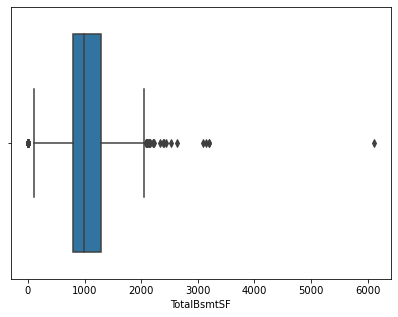

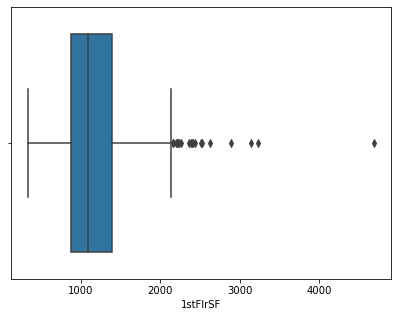

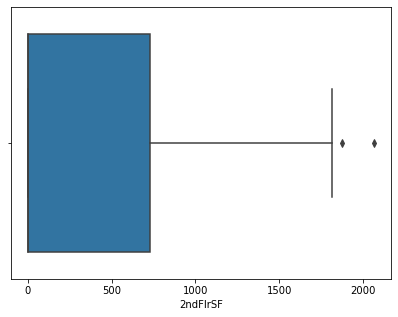

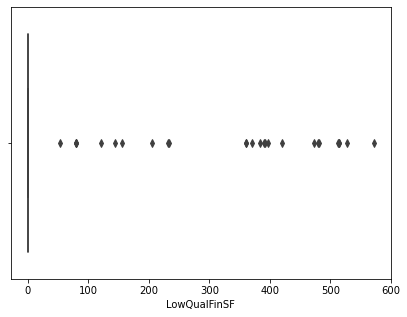

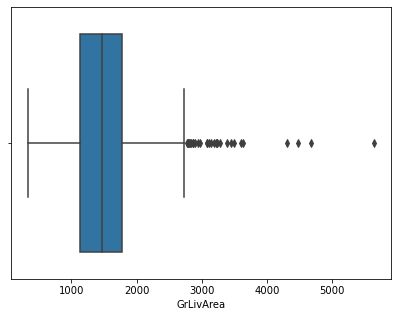

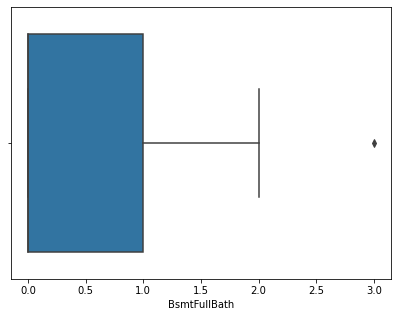

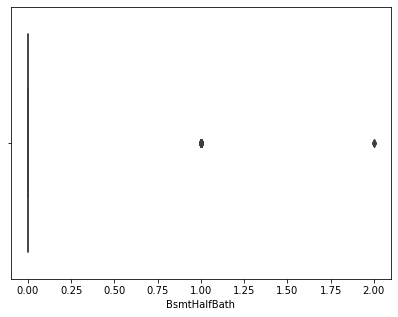

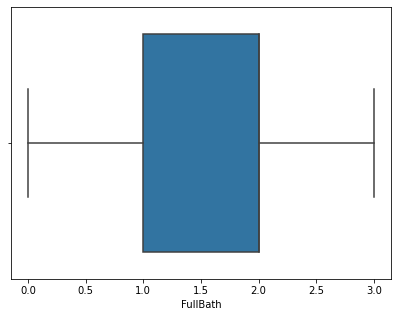

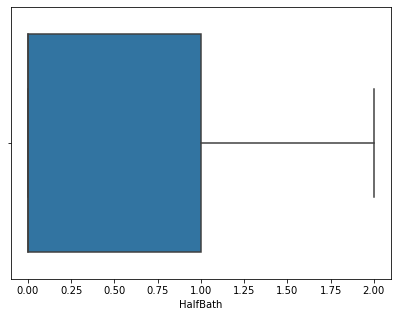

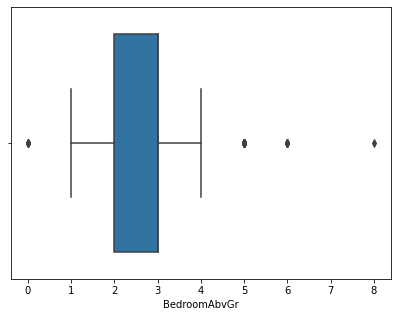

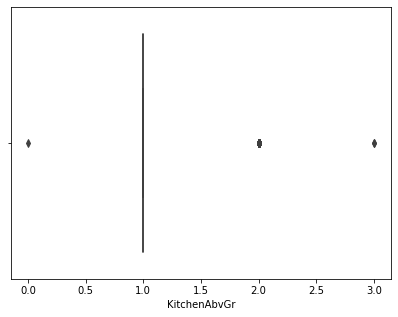

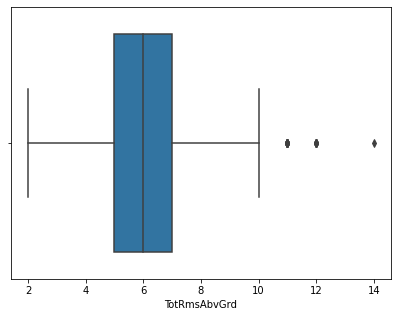

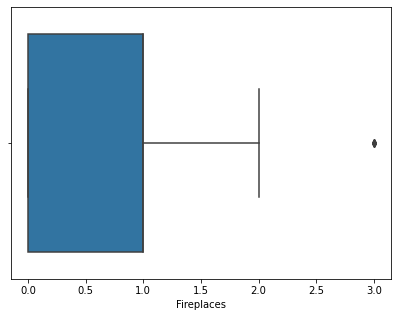

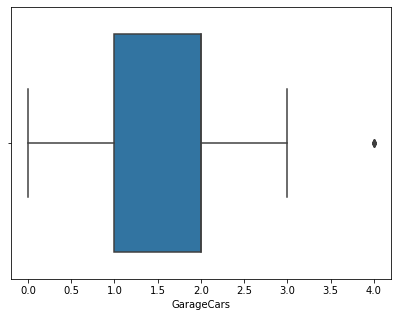

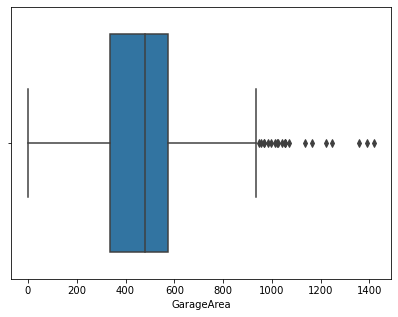

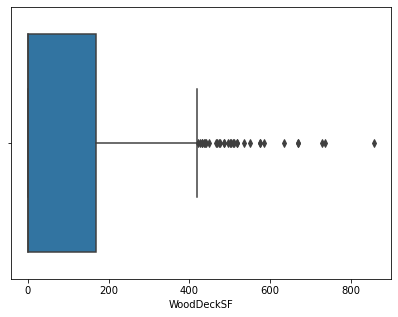

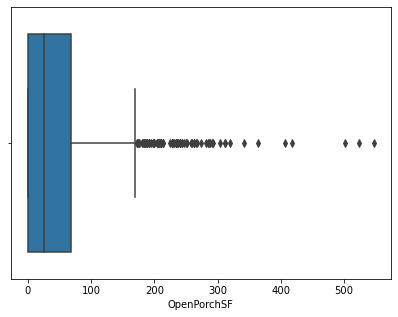

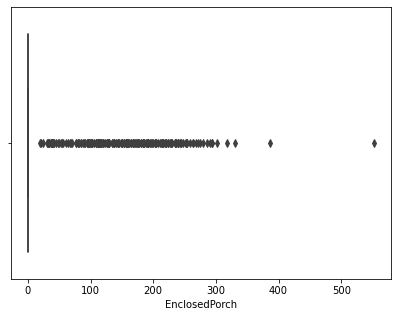

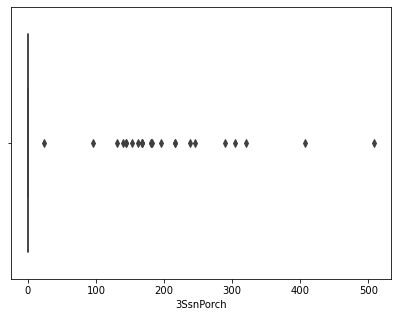

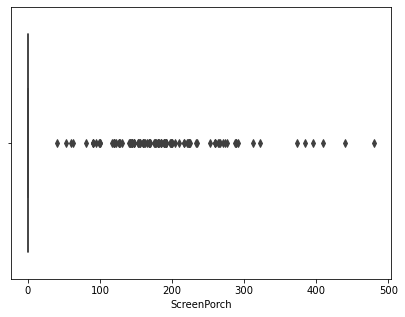

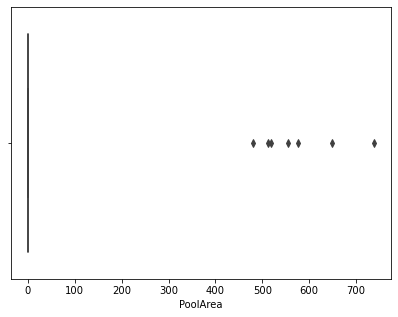

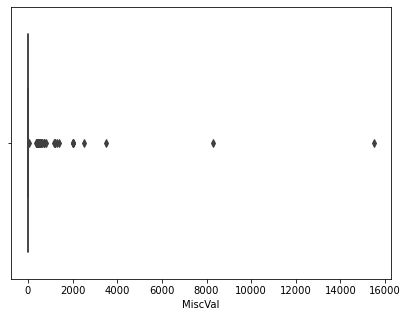

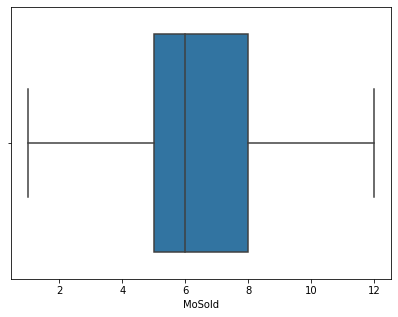

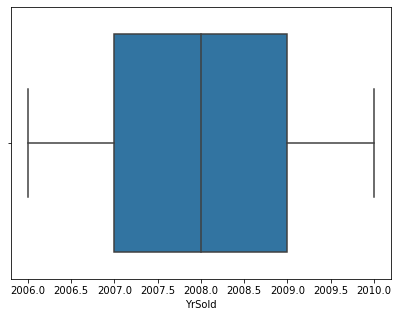

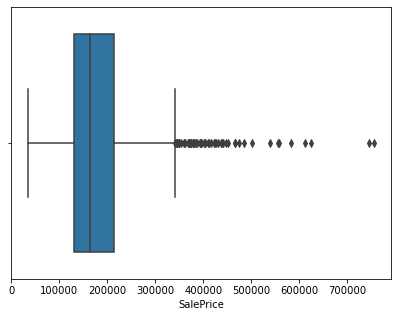

In [35]:
#using boxplot we are visualizing numerical variabless
df_n = df.select_dtypes(include=['int64', 'float64'])
for col in df_n.columns:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,2)
    sns.boxplot(df_n[col])
    plt.show() 

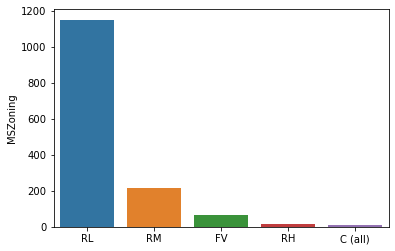

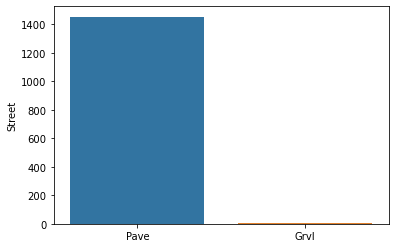

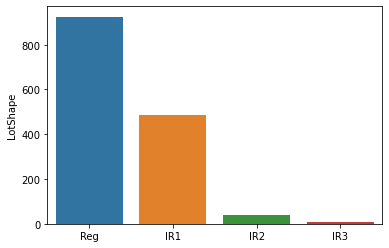

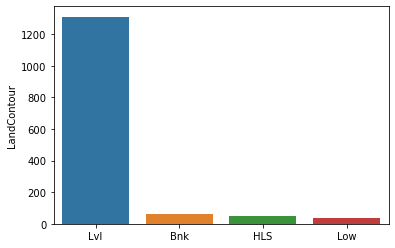

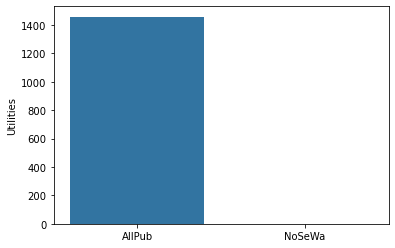

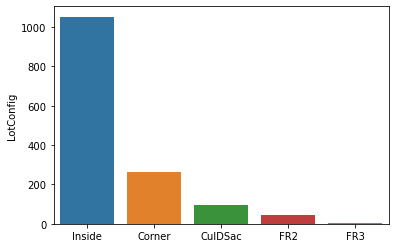

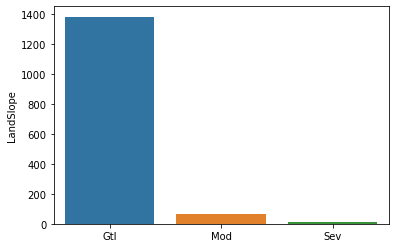

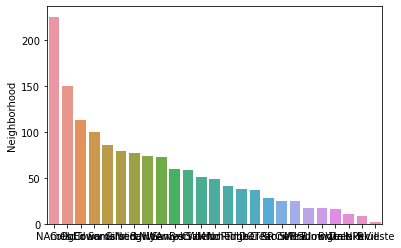

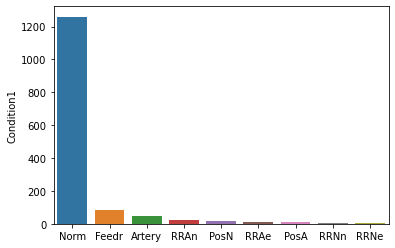

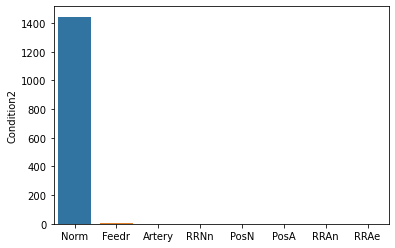

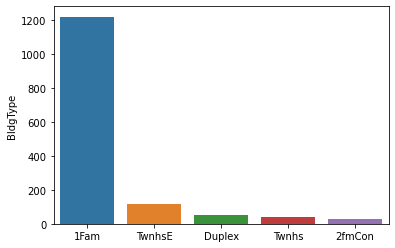

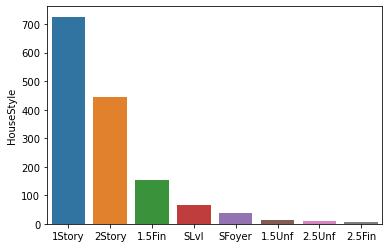

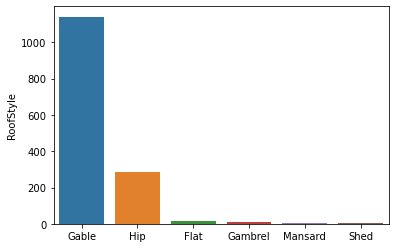

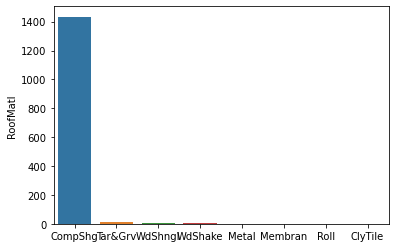

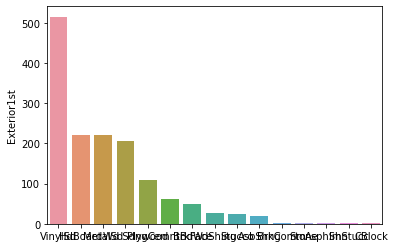

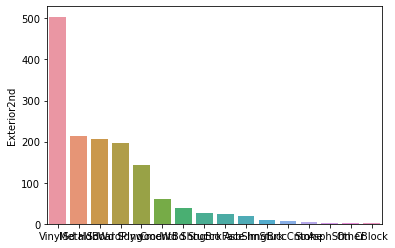

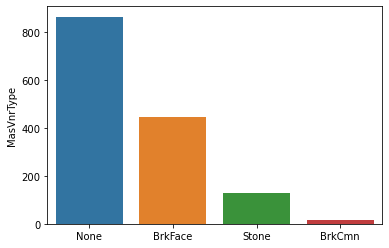

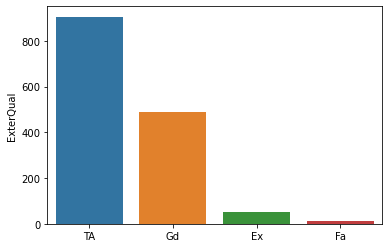

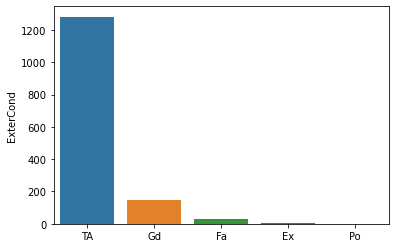

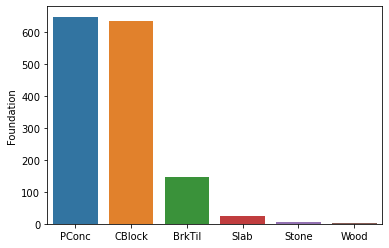

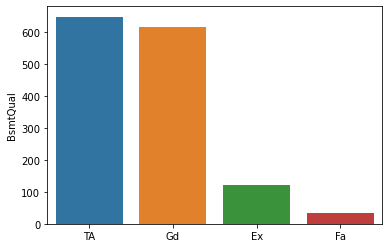

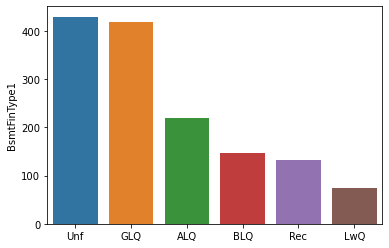

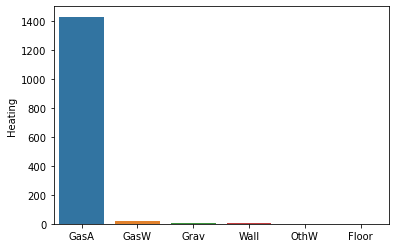

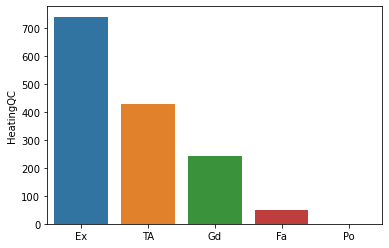

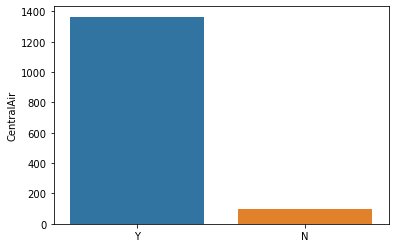

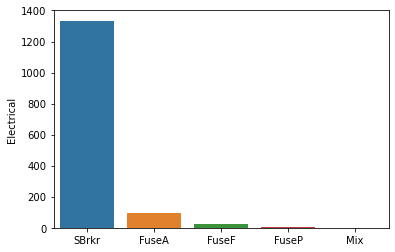

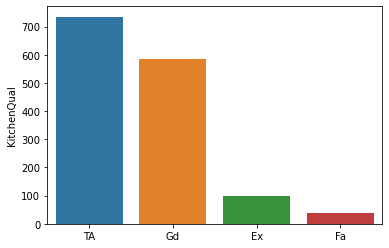

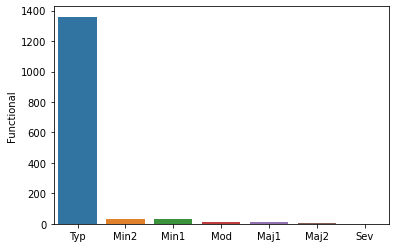

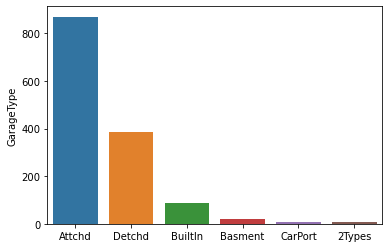

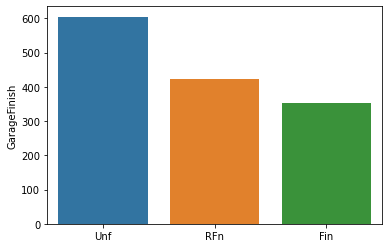

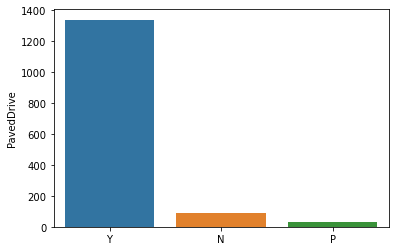

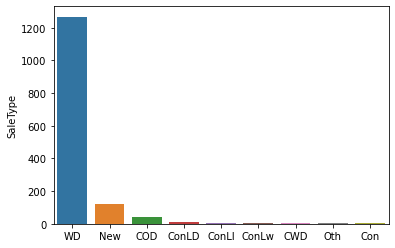

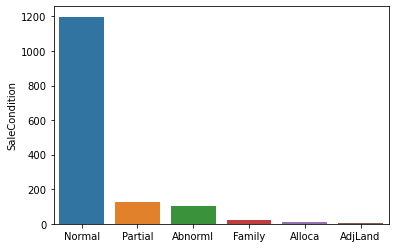

In [36]:
# using bar plots we are visualizing categorical variables
df_c = df.select_dtypes(include='object')
for col in df_c.columns:
    sns.barplot(df_c[col].value_counts().index, df_c[col].value_counts())
    plt.show()

In [37]:
a = [b for b in df.columns if df.dtypes[b]=='object']

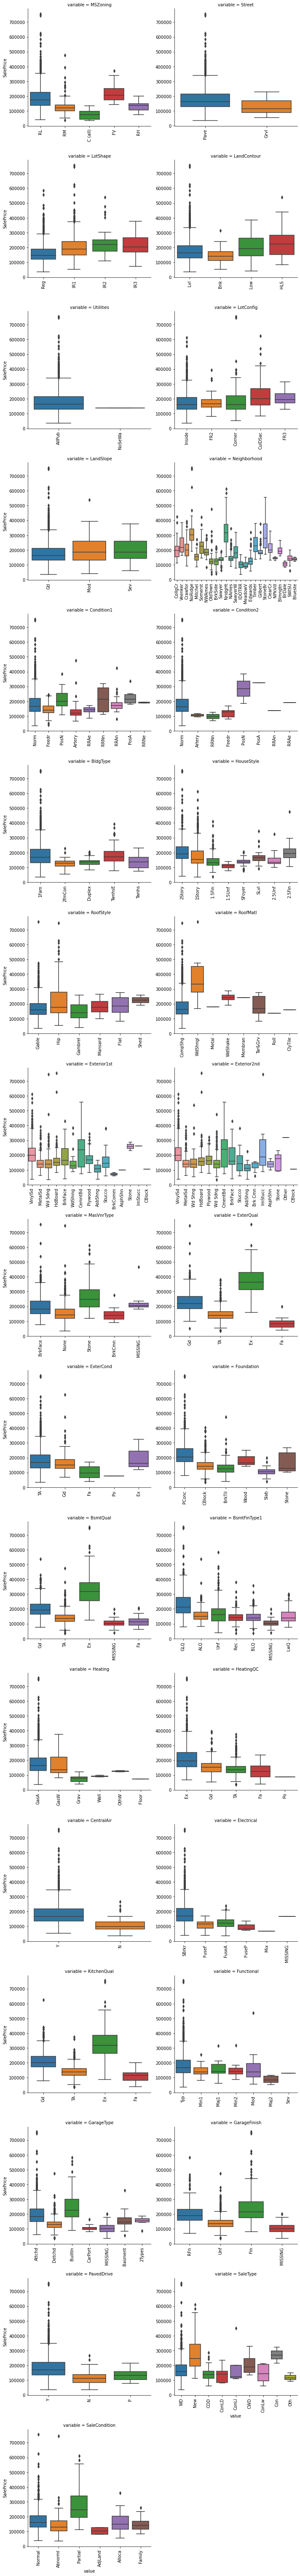

In [38]:
for c in a:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
b = pd.melt(df, id_vars=['SalePrice'], value_vars=a)
g = sns.FacetGrid(b, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value","SalePrice")

# STEP 2 : Data Preparation

### creating Dummy variables

In [39]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition

In [40]:
date_col=["YearBuilt","YearRemodAdd","YrSold","MoSold"]

In [41]:
#dropping the above columns 
df.drop(date_col,axis=1,inplace=True)
df.shape

(1460, 63)

In [42]:
#creeating a list of variables which are categorical and storing it in a list

df_cat=df.select_dtypes("category").columns
df_cat

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
# creating dummy variables

df_dummy=pd.get_dummies(df[df_cat],drop_first=True)

In [44]:
df_dummy.head(2)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### Rescaling  the Features

In [45]:
#for the model to be easily understandable we need to scale the values
#there are basically of two types min-max scaling and standardization.

In [46]:
col=df_dummy.columns
df_dummy=pd.DataFrame(scale(df_dummy))
df_dummy.columns=col
df_dummy.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=183)

### spliting the data  into train and test data

In [63]:
X_train,X_test,y_train,y_test=train_test_split(df_dummy,y,train_size=0.7,test_size=0.3,random_state=42)

# STEP 3 : Training a Model

In [47]:
y=df.pop("SalePrice")
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [48]:
X = df
X.head(1)
X.shape

(1460, 62)

In [99]:
X_train.shape

(1021, 183)

# STEP 4  :Model Building and Model Evaluation

### Using Linear Regression Model

In [64]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [65]:
#prediction on the basis of the model
y_pred=reg.predict(X_train)
y_pred

array([161347.3828125 ,  96609.3828125 , 259052.6484375 , ...,
       136578.3828125 , 103504.30078125, 186224.3828125 ])

In [66]:
#evaluating the model on basis of train set

In [67]:
r2_score(y_train,y_pred)

0.833970024434481

In [68]:
mean_squared_error(y_train,y_pred)

1000233944.4486465

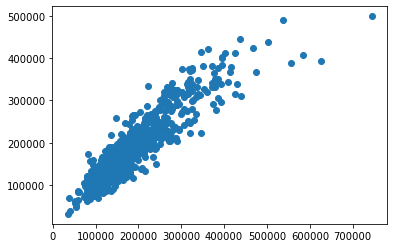

In [69]:
plt.scatter(y_train,y_pred)
plt.show()

In [70]:
#evaluating the model on basis of test set

In [71]:
y_test_pred=reg.predict(X_test)

In [72]:
r2_score(y_test,y_test_pred)

-1.5284935690639157e+20

In [73]:
mean_squared_error(y_test,y_test_pred)

1.0665971437920761e+30

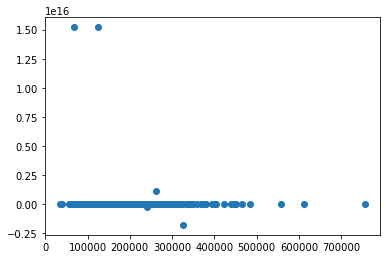

In [74]:
plt.scatter(y_test,y_test_pred)
plt.show()

### Using Ridge Regression

In [75]:
#checking different values of alpha
ridge=Ridge()

In [108]:
#list of lamda values for iteration
lambdas=[0,0.0004, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [109]:
# an iterative way to attain the values of lamda
for l in lambdas:
    ridge=Ridge(alpha=l)
    ridge.fit(X_train, y_train)
    y_train_pred=ridge.predict(X_train)
    print(l,'-',r2_score(y_train,y_train_pred))

0 - 0.8238221148582725
0.0004 - 0.8339701975097888
0.001 - 0.833970197431273
0.01 - 0.8339701882105225
0.1 - 0.8339692975538241
1 - 0.8339005154143326
10 - 0.8314970144886585
100 - 0.8103489594650253
1000 - 0.7167122426417758


In [78]:
#for train data
lamda=10
ridge=Ridge(alpha=lamda)
ridge.fit(X_train,y_train)
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.8314970144886585

In [79]:
#for test data
lamda=10
ridge=Ridge(alpha=lamda)
ridge.fit(X_test,y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.8822490192918696

In [80]:
#for train data
lamda=5
ridge=Ridge(alpha=lamda)
ridge.fit(X_train,y_train)
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.8330065985778851

In [81]:
#for test data
lamda=5
ridge=Ridge(alpha=lamda)
ridge.fit(X_test,y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.8836138359221309

In [82]:
#for train data
lamda=1
ridge=Ridge(alpha=lamda)
ridge.fit(X_train,y_train)
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.8339005154143326

In [83]:
#for test data
lamda=1
ridge=Ridge(alpha=lamda)
ridge.fit(X_test,y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.8849062301963654

In [84]:
#model evaluation on train set
r2_score(y_train,y_train_pred)

0.8339005154143326

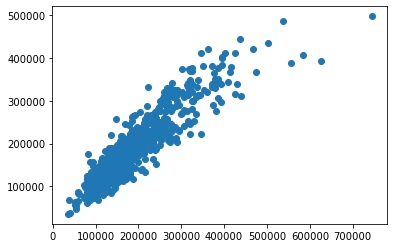

In [85]:
plt.scatter(y_train,y_train_pred)
plt.show()

In [86]:
#model evaluation on test data
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.8849062301963654

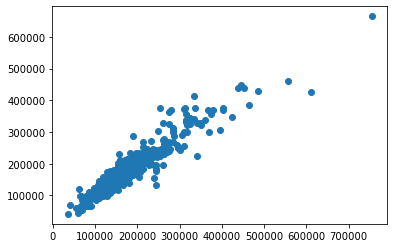

In [87]:
plt.scatter(y_test,y_test_pred)
plt.show()

### Using Lasso Regression

In [88]:
lasso=Lasso()

In [89]:
# an iterative way to attain the values of lamda
for l in lambdas:
    lasso=Lasso(alpha=l)
    lasso.fit(X_train, y_train)
    y_train_pred=lasso.predict(X_train)
    print(l,'-',r2_score(y_train,y_train_pred))

0 - 0.8339701841710243
0.001 - 0.8339701839614283
0.01 - 0.8339701819319574
0.1 - 0.8339701478512869
1 - 0.8339684744782778
10 - 0.8338656850724158
100 - 0.830753773050645
1000 - 0.7977080930754911


In [90]:
#for train data
lamda=5
lasso=Lasso(alpha=lamda)
lasso.fit(X_train,y_train)
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8339372608825801

In [114]:
lamda=0.001
lasso=Lasso(alpha=lamda)
lasso.fit(X_train,y_train)
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8339701839614283

In [91]:
#for test data
lamda=5
lasso=Lasso(alpha=lamda)
lasso.fit(X_test,y_test)
y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8851233865978447

In [115]:
lamda=0.001
lasso=Lasso(alpha=lamda)
lasso.fit(X_test,y_test)
y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8851594982040492

In [92]:
#for train data
lamda=20
lasso=Lasso(alpha=lamda)
lasso.fit(X_train,y_train)
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8336767155652176

In [93]:
#for test data
lamda=20
lasso=Lasso(alpha=lamda)
lasso.fit(X_test,y_test)
y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8849335237640421

In [95]:
#After regularization we can see changes in coefficients
lamda = pd.DataFrame(index=df_dummy.columns)
lamda.rows = df_dummy.columns
lamda

""
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [96]:
#now let us fill the value of lamda for Ridge and Lasso coefficient

lamda['Ridge'] = ridge.coef_
lamda['Lasso'] = lasso.coef_
lamda

,Ridge,Lasso
MSZoning_FV,1.475843e+04,16562.591154
MSZoning_RH,6.360081e+03,7220.757812
MSZoning_RL,2.382763e+04,27491.383038
MSZoning_RM,1.978420e+04,22683.882842
Street_Pave,-5.936433e+03,-6255.476356
...,...,...
SaleCondition_AdjLand,3.807591e-26,-0.000000
SaleCondition_Alloca,-6.401057e+02,-583.147834
SaleCondition_Family,1.281702e+03,1254.690337
SaleCondition_Normal,6.615086e+03,6535.348823


In [98]:
lamda[lamda['Lasso']==0]

,Ridge,Lasso
Utilities_NoSeWa,0.000000e+00,0.0
Neighborhood_SawyerW,-4.768809e+02,-0.0
Condition1_RRNn,-3.150046e-26,-0.0
Condition2_Norm,-4.549431e+02,0.0
Condition2_PosN,0.000000e+00,0.0
Condition2_RRAe,0.000000e+00,0.0
Condition2_RRAn,0.000000e+00,0.0
RoofStyle_Gable,4.099727e+02,-0.0
RoofStyle_Shed,0.000000e+00,0.0
RoofMatl_CompShg,-3.848154e+03,-0.0


In [97]:
#the shape which predicts how many attributes are removed by lassso
lamda[lamda['Lasso']==0].shape
#out of 183 in x train attributes 35 have been removed

(35, 2)

In [100]:
lamda.loc[lamda['Lasso']!=0, 'Lasso']

MSZoning_FV              16562.591154
MSZoning_RH               7220.757812
MSZoning_RL              27491.383038
MSZoning_RM              22683.882842
Street_Pave              -6255.476356
                             ...     
SaleType_WD              -4899.924047
SaleCondition_Alloca      -583.147834
SaleCondition_Family      1254.690337
SaleCondition_Normal      6535.348823
SaleCondition_Partial     4327.960458
Name: Lasso, Length: 148, dtype: float64

In [107]:
#we need top features so that it will help the firm to predict the house prediction
lamda['Lasso'].sort_values(ascending=False)[:10]

MSZoning_RL             27491.383038
MSZoning_RM             22683.882842
MSZoning_FV             16562.591154
RoofMatl_WdShngl        14992.189520
Neighborhood_NoRidge    11754.074129
HouseStyle_2Story        9928.796483
BsmtFinType1_GLQ         9779.967439
Neighborhood_StoneBr     9464.648771
Neighborhood_NridgHt     9343.330884
Foundation_PConc         8440.096087
Name: Lasso, dtype: float64

## The features which are responsible for predicting the price based on Lasso Model are ------MSZoning_RL,MSZoning_RM,MSZoning_FV,RoofMatl_WdShngl,Neighborhood_NoRidge,HouseStyle_2Story,BsmtFinType1_GLQ,Neighborhood_StoneBr,Neighborhood_NridgHt,Foundation_PConc